In [1]:
import helpyer_function as hp

hp.import_or_install("scipy")
hp.import_or_install("numpy")
hp.import_or_install("matplotlib")

Original Array:
[[194 146 233 225 227  52   5  47]
 [172 181  84 167 181 115 133 207]
 [242  50  91  77 121 244 220 149]
 [ 95  95  79  90 174  69  36 143]
 [117  18  82 107 104  81  54 220]
 [ 67 229 159  25  43  85 237 154]
 [224  77  23  75  44 135 136  40]
 [ 71 224 248 232 179  70  55  49]]


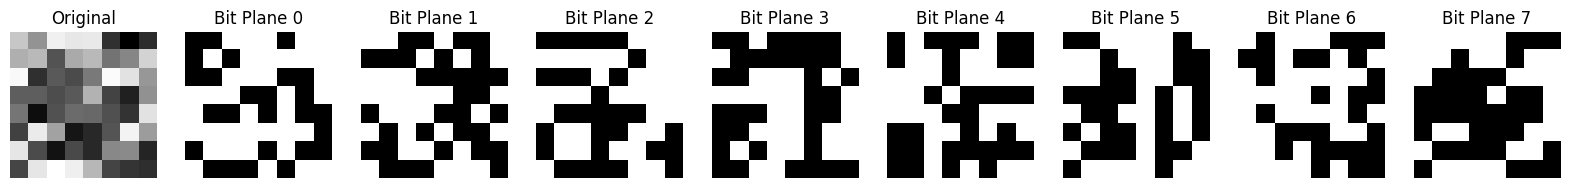

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 創建隨機的8x8陣列，值在0到255之間
array = np.random.randint(0, 255, size=(8, 8))

# 顯示原始陣列
print("Original Array:")
print(array)

# 創建一個8x8x8的陣列來存儲每個位元平面
bit_planes = np.zeros((8, 8, 8), dtype=np.uint8)

# 分離每個位元平面
for bit in range(8):
    bit_planes[:, :, bit] = (array >> bit) & 1

# 顯示原始陣列和位元平面
fig, axes = plt.subplots(1, 9, figsize=(20, 5))
axes[0].imshow(array, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for bit in range(8):
    axes[bit+1].imshow(bit_planes[:, :, bit], cmap='gray')
    axes[bit+1].set_title(f'Bit Plane {bit}')
    axes[bit+1].axis('off')

plt.show()


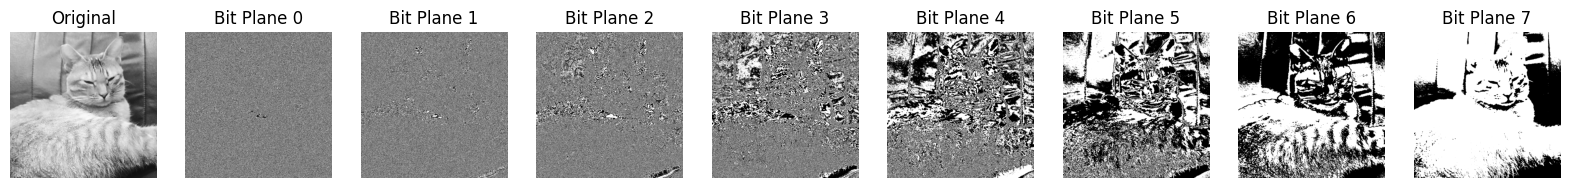

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def bit_plane_slicing(image_array):
    """
    分離圖像的每個位元平面

    :param image_array: numpy array, 任意大小的圖像數組，值在0到255之間
    :return: 分離出的位元平面陣列
    """
    if image_array.dtype != np.uint8:
        raise ValueError("The input image array must be of type np.uint8")
    
    height, width = image_array.shape
    bit_planes = np.zeros((height, width, 8), dtype=np.uint8)

    # 分離每個位元平面
    for bit in range(8):
        bit_planes[:, :, bit] = (image_array >> bit) & 1

    return bit_planes

def display_bit_planes(original_image, bit_planes):
    """
    顯示原始圖像和位元平面

    :param original_image: numpy array, 原始圖像
    :param bit_planes: numpy array, 分離出的位元平面
    """
    fig, axes = plt.subplots(1, 9, figsize=(20, 5))
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

    for bit in range(8):
        axes[bit+1].imshow(bit_planes[:, :, bit], cmap='gray')
        axes[bit+1].set_title(f'Bit Plane {bit}')
        axes[bit+1].axis('off')

    plt.show()

def img_read_array(image_path, turn_to_gray=False):
    # 讀取圖像
    img = Image.open(image_path)
    
    # 如果需要轉換為灰階
    if turn_to_gray:
        img = img.convert('L')
    
    # 將圖像轉換為 NumPy 數組
    img_array = np.array(img)
    
    return img_array

# 測試方法
if __name__ == "__main__":
    # 創建一個隨機的圖像陣列
    image_path = r'F:\Code\Digtal-Image-Processing\LAB_CAT2.jpg'
    image_array = img_read_array(image_path, turn_to_gray=True)
    # image_array = np.random.randint(0, 255, size=(8, 8), dtype=np.uint8)
    
    # 分離位元平面
    bit_planes = bit_plane_slicing(image_array)
    
    # 顯示結果
    display_bit_planes(image_array, bit_planes)
